In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


In [ ]:
# Features: [Height, Weight]
X = np.array([[150, 50], [160, 55], [170, 60], [180, 65]])

# Labels: 0 = Short, 1 = Tall
y = np.array([0, 0, 1, 1])


In [ ]:
clf = svm.SVC(kernel='linear')  # using a linear kernel
clf.fit(X, y)


SVC(kernel='linear')

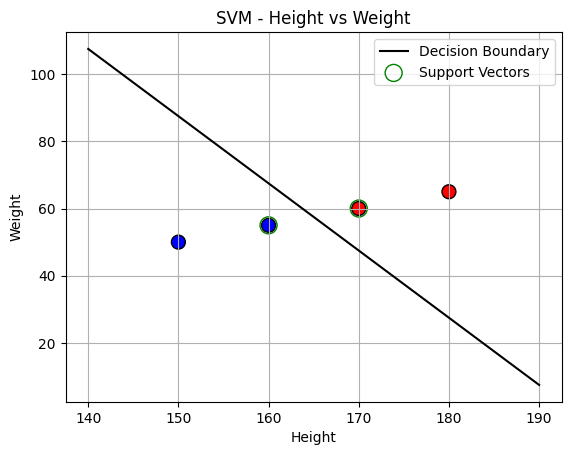

In [ ]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('SVM - Height vs Weight')

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Create a line: w0*x + w1*y + b = 0 → y = (-w0*x - b)/w1
x_points = np.linspace(140, 190)
y_points = -(w[0] * x_points + b) / w[1]
plt.plot(x_points, y_points, 'k-', label='Decision Boundary')

# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='g', label='Support Vectors')

plt.legend()
plt.grid(True)
plt.show()


In [7]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [8]:
data = pd.DataFrame({
    'Amount': [200, 5000, 120, 3000, 400],
    'Time': [10, 50, 5, 70, 30],
    'Age': [30, 22, 40, 25, 35],
    'CountryRisk': [2, 4, 1, 5, 2],
    'MerchantType': [1, 3, 2, 3, 1],
    'Fraud': [0, 1, 0, 1, 0]
})

In [9]:
X = data.drop('Fraud', axis=1)
y = data['Fraud']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Predicted Labels:", y_pred)
print("Actual Labels:   ", list(y_test))

Predicted Labels: [1]
Actual Labels:    [1]


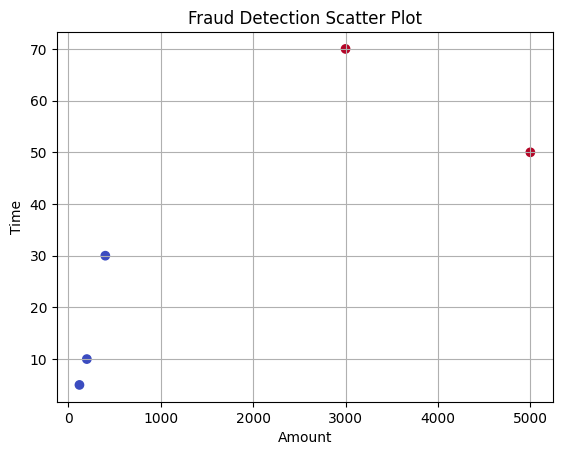

In [14]:
plt.scatter(data['Amount'], data['Time'], c=data['Fraud'], cmap='coolwarm')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Fraud Detection Scatter Plot')
plt.grid(True)
plt.show()


In [18]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [19]:
data = pd.DataFrame({
    'Amount': [200, 5000, 120, 3000, 400, 2500, 50, 6200, 300, 2700],
    'Time': [10, 50, 5, 70, 30, 20, 15, 80, 12, 65],
    'Age': [30, 22, 40, 25, 35, 28, 45, 23, 33, 27],
    'CountryRisk': [2, 4, 1, 5, 2, 3, 1, 5, 2, 4],
    'MerchantType': [1, 3, 2, 3, 1, 2, 2, 3, 1, 2],
    'Fraud': [0, 1, 0, 1, 0, 0, 0, 1, 0, 1]
})

In [20]:
X = data.drop('Fraud', axis=1)
y = data['Fraud']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [23]:
y_pred = model.predict(X_test)

In [24]:
print("Predicted:", y_pred)
print("Actual:   ", list(y_test))

Predicted: [0 1 1]
Actual:    [0, 1, 0]


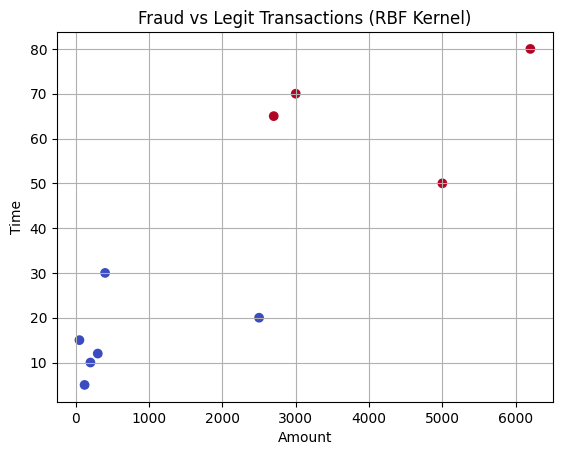

In [25]:
plt.scatter(data['Amount'], data['Time'], c=data['Fraud'], cmap='coolwarm')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Fraud vs Legit Transactions (RBF Kernel)')
plt.grid(True)
plt.show()


In [29]:
new_data = [[1500, 45, 29, 3, 2]]

prediction = model.predict(new_data)
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [27]:
print("\nNew Transaction Prediction:", "Fraud" if prediction[0] == 1 else "Legit")


New Transaction Prediction: Legit


In [32]:
new_data = pd.DataFrame([
    [1500, 45, 29, 3, 2],
    [100, 5, 41, 1, 1],
    [6000, 75, 21, 5, 3]
], columns=['Amount', 'Time', 'Age', 'CountryRisk', 'MerchantType'])

predictions = model.predict(new_data)
predictions

array([0, 0, 1])

In [31]:
print("\nPredictions for multiple transactions:")
for i, p in enumerate(predictions):
    print(f"Transaction {i+1}: {'Fraud' if p == 1 else 'Legit'}")


Predictions for multiple transactions:
Transaction 1: Legit
Transaction 2: Legit
Transaction 3: Fraud


In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
minmax_scaler= MinMaxScaler()

In [46]:
train_feature = [[1000], [1500], [2000]]
standard_scaler.fit(train_feature)

StandardScaler()

In [47]:
train_feature1 = [[23], [15], [20]]
minmax_scaler.fit(train_feature)

MinMaxScaler()

In [48]:
new_data = [[1500, 45, 29, 3, 2]]
new_data = np.array(new_data)

feature1 = new_data[:, [0]]
feature2 = new_data[:, [2]]
print(feature1)
print(feature2)

[[1500]]
[[29]]


In [53]:
scaled1 = standard_scaler.transform(feature1)
scaled2 = minmax_scaler.transform(feature2)
print(scaled2)

[[-0.971]]


In [51]:
new_data_scaled = new_data.copy()
new_data_scaled[0, 0] = scaled1[0, 0]
new_data_scaled[0, 2] = scaled2[0, 0]